# 4.9 Python Visualizations Part 1

#### This script will address the following:
1. Importing libraries
2. Importing data
3. Creating visualizations
4. Exporting dataframe with prices greater than $100 removed

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2. Importing Data

In [2]:
path = r'C:\Users\keely\Documents\Courses\CareerFoundry\Immersion\Achievement 4 - Python\01-2023 Instacart Basket Analysis'

In [3]:
df_ords_prods_customers = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_flags.pkl'))

In [4]:
df_ords_prods_customers.shape

(32404859, 24)

In [5]:
pd.options.display.max_columns = None

### 3. Creating Visualizations

In [6]:
df_ords_prods_customers.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0  2539329       1             1                   2                  8   
1  2398795       1             2                   3                  7   
2   473747       1             3                   3                 12   
3  2254736       1             4                   4                  7   
4   431534       1             5                   4                 15   

   days_since_prior_order  new_customer  product_id  add_to_cart_order  \
0                     NaN          True         196                  1   
1                    15.0         False         196                  1   
2                    21.0         False         196                  1   
3                    29.0         False         196                  1   
4                    28.0         False         196                  1   

   reordered product_name  aisle_id  department_id  prices        price_label  \
0          0         Soda        77              7     9.0  Mid-range product   
1          1         Soda        77              7     9.0  Mid-range product   
2          1         Soda        77              7     9.0  Mid-range product   
3          1         Soda        77              7     9.0  Mid-range product   
4          1         Soda        77              7     9.0  Mid-range product   

      busiest_day     busiest_days busiest_period_of_day  max_order  \
0  Regularly busy   Regularly busy           Most orders         10   
1  Regularly busy  Least busy days        Average orders         10   
2  Regularly busy  Least busy days           Most orders         10   
3      Least busy  Least busy days        Average orders         10   
4      Least busy  Least busy days           Most orders         10   

   loyalty_flag  avg_spent spending_flag  med_days_since_prior_order  \
0  New customer   6.367797   Low spender                        20.5   
1  New customer   6.367797   Low spender                        20.5   
2  New customer   6.367797   Low spender                        20.5   
3  New customer   6.367797   Low spender                        20.5   
4  New customer   6.367797   Low spender                        20.5   

    order_frequency_flag  
0  Non-frequent customer  
1  Non-frequent customer  
2  Non-frequent customer  
3  Non-frequent customer  
4  Non-frequent customer

<AxesSubplot:title={'center':'Product Orders by Day of Week'}, xlabel='Day of Week', ylabel='Product Orders (in millions)'>

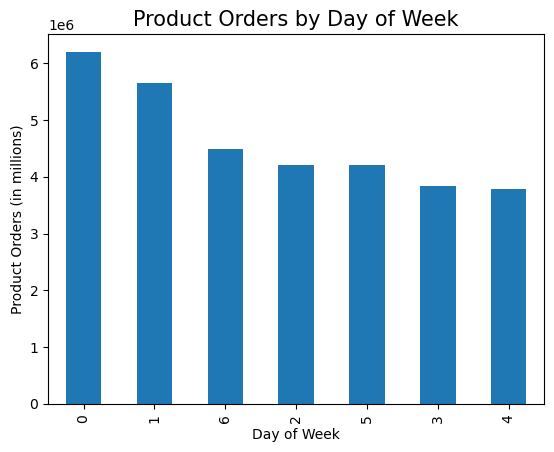

In [7]:
# With matplot lib installed, pandas used function from the matplotlib library to create the chart.

plt.title('Product Orders by Day of Week', fontsize=15)
plt.xlabel('Day of Week')
plt.ylabel('Product Orders (in millions)')
df_ords_prods_customers['orders_day_of_week'].value_counts().plot.bar()

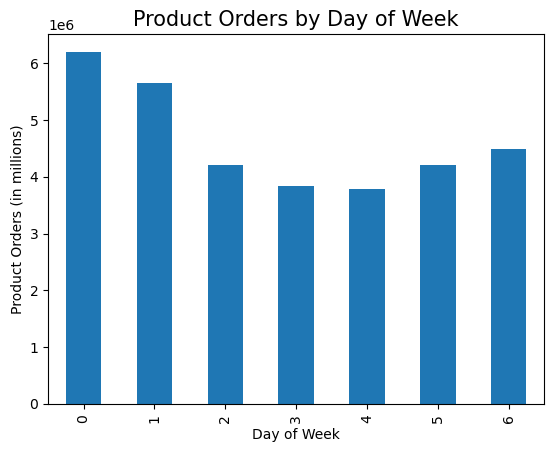

In [8]:
# Doing this (code below) this way (using sort_index()), will sort the days of the week in order of their index 
# rather than by descending order of results.

plt.title('Product Orders by Day of Week', fontsize=15)
plt.xlabel('Day of Week')
plt.ylabel('Product Orders (in millions)')
bar = df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# The above can be used when printing frequencies as well:

df_ords_prods_customers['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [10]:
df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

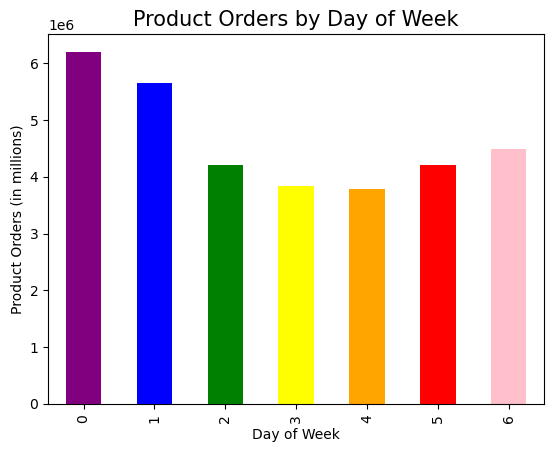

In [11]:
# Printing the bar chart with colored bars, arguments put in bar() function parenthesis.

# Also, naming it a variable "bar" allows you to save the chart within the bar object and saved it to Jupyter's memory, 
# and you can access it any time by calling bar.figure.

plt.title('Product Orders by Day of Week', fontsize=15)
plt.xlabel('Day of Week')
plt.ylabel('Product Orders (in millions)')
bar_2 = df_ords_prods_customers['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'pink'])

In [12]:
# Use the figure.savefig() function to export a chart outside Jupyter.

bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

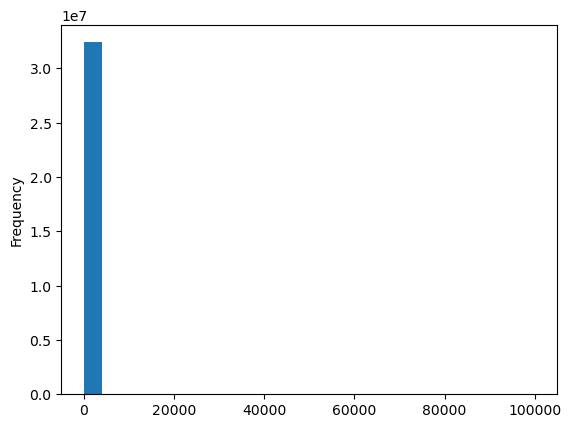

In [13]:
# Now, this is a histogram of the prices column. 

df_ords_prods_customers['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

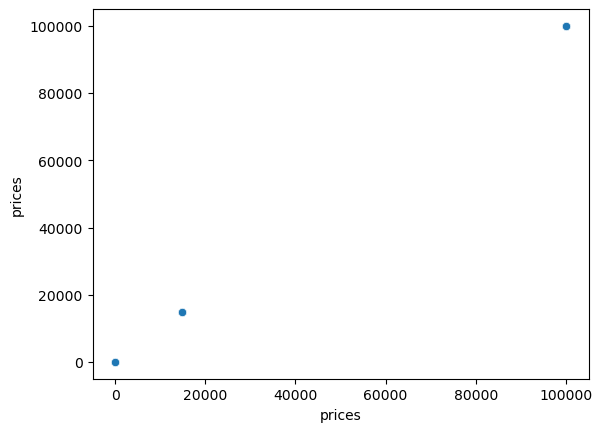

In [14]:
# As we learned in Achievement 2, another way to explore your data is a scatterplot. You can use scatterplots
# to visualize the distribution of data points to identify outliers. Here, we plot the prices column against itself.

#sns means the scatterplot() function is from the seaborn library.

sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_customers)

In [15]:
# Another way to view outliers in data or reason for the single bar in the histogram above:

df_ords_prods_customers['prices'].mean()

10.48614501953125

In [16]:
df_ords_prods_customers['prices'].median()

7.400000095367432

In [17]:
df_ords_prods_customers['prices'].max()

99999.0

In [18]:
pd.options.display.max_rows = None

In [19]:
pd.options.display.max_columns = None

In [20]:
df_ords_prods_customers.loc[df_ords_prods_customers['prices'] > 100]

order_id user_id  order_number  orders_day_of_week  \
10030345   912404      17            12                   2   
10030346   603376      17            22                   6   
10030347  3264360     135             2                   2   
10030348   892534     135             3                   0   
10030349   229704     342             8                   1   
10030350  2856927     618             2                   5   
10030351  1871776     618             3                   6   
10030352  2575782     658            19                   1   
10030353   642211     658            21                   3   
10030354   591140     658            30                   6   
10030355  1116834     658            32                   2   
10030356   260601     846             2                   3   
10030357   573149     866             4                   3   
10030358  2589688     866             5                   3   
10030359   525880     866             6                   1   
10030360   265986     866             7                   1   
10030361  2920240     866             8                   2   
10030362   500920     866             9                   0   
10030363  1457337     866            10                   5   
10030364  1916506     866            11                   1   
10030365  1258862     866            12                   0   
10030366  2881244     866            13                   6   
10030367   379654     866            14                   0   
10030368   156071     917             7                   1   
10030369  2884554     917             8                   2   
10030370  1983147     917             9                   6   
10030371     3245     917            11                   1   
10030372  2772015     917            16                   3   
10030373  1209345     917            19                   5   
10030374  1496387     962             5                   4   
10030375  3376430    1032             1                   0   
10030376  2309971    1032             3                   3   
10030377  1303175    1040             3                   0   
10030378   694349    1162             9                   5   
10030379  2606341    1227             2                   6   
10030380  2920834    1284             8                   4   
10030381   280039    1284             9                   1   
10030382  1435153    1519            26                   2   
10030383  1066435    1519            32                   3   
10030384  1234215    1702             6                   3   
10030385   618635    1702            10                   0   
10030386   223891    1829             6                   5   
10030387   682835    1875             2                   5   
10030388  3242848    1941             4                   3   
10030389  2224211    1941            25                   0   
10030390   422540    2056             6                   0   
10030391  1697208    2409            33                   1   
10030392   579854    2466             7                   6   
10030393  2716179    2700             7                   2   
10030394   461261    2768            10                   1   
10030395  2699729    2823             1                   3   
10030396   298222    3067            30                   3   
10030397   747821    3117            12                   6   
10030398  3203694    3136             1                   3   
10030399  2990379    3220             1                   0   
10030400    77356    3300             2                   3   
10030401  1563356    3512            14                   4   
10030402  2332876    3685             1                   2   
10030403  1554378    3685             3                   1   
10030404  1743110    3685             7                   4   
10030405  1179835    3690            24                   1   
10030406   832777    3690            25                   2   
10030407  3087504    3690            32 

In [21]:
# Here, we turn all those prices outliers to null or NaN.

df_ords_prods_customers.loc[df_ords_prods_customers['prices'] >100, 'prices'] = np.nan

In [22]:
df_ords_prods_customers['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

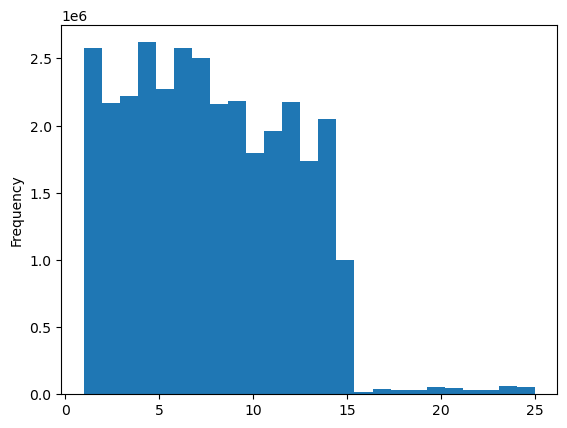

In [23]:
# We will try the histogram again to see if the issue was fixed.

df_ords_prods_customers['prices'].plot.hist(bins = 25)

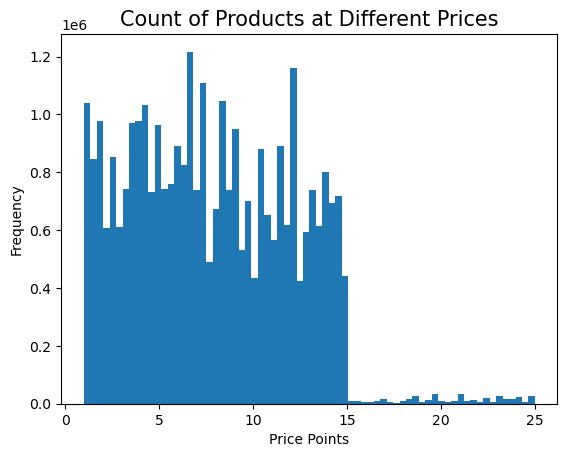

In [24]:
# Creating the same histogram as above but with more bins to get a clearer view of the distribution of the data.

plt.title('Count of Products at Different Prices', fontsize=15)
plt.xlabel('Price Points')
plt.ylabel('Number of Products')

hist_2 = df_ords_prods_customers['prices'].plot.hist(bins = 70)

In [25]:
# Exporting this histogram as an image outside Python.

hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'))

In [26]:
# Here, we create random numbers from 0 to 1 for all the records, then choose only 30 percent of them.
# That way we get 30 percent of our random sampled 30% of the data set.

# np.random.rand() is actually what creates your list of random floating numbers between 0 and 1.

# 1) In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python 
# will always give you the same set of random numbers (in this case, seed “4”)

# 2) The "dev" variable will be what stores your boolean values—you’ll be getting an output of True or False for every 
# value based on whether it’s less than or equal to 0.7. What’s new, however, is the np.random.rand() function 
# being used as your argument. This function is what will actually create your list of random floating numbers 
# between 0 and 1.

np.random.seed(4) #Sets the seed for the random number generator.
dev = np.random.rand(len(df_ords_prods_customers)) <= 0.7  #This creates 32,404,859 random numbers, the lenth of my 
# dataframe. A logical test comparing each of the values to 0.7. Finally, dev stores stores the results of the test
# in a new list, called "dev", in the form of boolean values (True or False).

In [27]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [28]:
# Create a list that stores 70% of the sample in the big dataframe. 
# The equation in an above cell (dev = np.random.rand(len) . . .) sets values to true that are less than or equal to 0.7
# grouping 70% of the data set. "[dev]" in the below statement puts all records that are true into the big data set.

big = df_ords_prods_customers[dev]

In [29]:
# Create a list that stores 30% of the sample in the small dataframe. 
# The equation in an above cell (dev = np.random.rand(len) . . .) sets values to true that are less than or equal to 0.7
# grouping 70% of the data set. "[~dev]" in the below statement puts all records that are false, or greater than 0.7 into 
# the small data set.

small = df_ords_prods_customers[~dev]

In [30]:
# Checking if the records in the big and small data sets add up to the orginal.

len(df_ords_prods_customers)

32404859

In [31]:
len(big) + len(small)

32404859

In [32]:
# Now, we create a subset of small, containing only orders_day_of_week and prices columns.

df_2 = small[['orders_day_of_week','prices']]

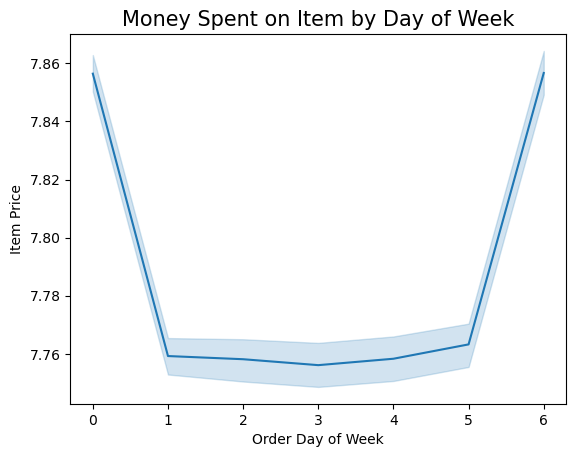

In [33]:
# Creating a line chart demonstrating the relationship between price of items bought on different days of the week.

plt.title('Money Spent on Item by Day of Week', fontsize=15 ) 
plt.xlabel('Order Day of Week')
plt.ylabel('Item Price')

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [34]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_day.png'))

In [36]:
# Exporting df_ords_prods_customers dataframe without the items erroneously price greater than $100.

df_ords_prods_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_flags_price_alt.pkl'))